### Домашнее задание 7: адаптивное управление и идентификация систем



#### Управление на основе адаптивной функции управления Ляпунова

1) **Компенсация**
- добавьте в систему задержку и трение, добейтесь того, чтобы стабилизация не происходила. Постарайтесь не переборщить, поскольку дальше нужно будет бороться с этими эффектами
- введите искусственное ограничение на момент при раскачивании в 0.8 max_torque
- добавьте компенсацию трения в предположении, что оно точно известно
- нарисуйте график момента от времени без компенсации и с компенсацией

2) **Оценка**
- добавьте график оценки коэффициента трения и реального коэффициента. Оценка пока что может быть любой
- добавьте обновление оценки коэффициента трения. Посмотрите на график. Достигается ли сходимость?
- модифицируйте код так, чтобы оценка не затиралась после выполнения симуляции. Достигается ли сходимость, если запускать симуляцию много раз? Как улучшить сходимость?

In [3]:
# YOUR CODE HERE

#### Идентификация линейных систем

Будем работать с оценкой параметров систем градиентными методами.

Нотация:
- $a$, $b$, $c$, ... - векторы
- $A$, $B$, $C$, ... - матрицы
- $\hat{A}$, $\hat{B}$, $\hat{С}$, ... - оценки матриц
- $\mathbb{A}_{\Delta t}$ - матрица дискретной системы с шагом $\Delta t$, полученная из $A$

Те места, где нужно писать код, выделены комментариями

`# YOUR CODE BELOW`

...your code...

`# YOUR CODE ABOVE`

Изучите еще раз код в следующей клетке. Осознайте, что и почему делается, при необходимости повторите вывод градиентного шага с помощью https://en.wikipedia.org/wiki/Matrix_calculus.

Матрица $\hat{A}$ (A с шапочкой, A_hat в коде) изменяется на каждом шаге в направлении, противоположном градиенту функции ошибки предсказания поведения системы.

Попробуйте поменять скорость обучения, начальное приближение, саму матрицу, число итераций алгоритма.

In [6]:
import numpy as np

A = np.array([[1.0, 2],
              [3, 4]])

A_hat = np.array([[0.0, 0],
               [0, 0]])

for i in range(300):
    x = np.array([[np.random.randn()],
                  [np.random.randn()]])
    
    xp = A @ x
    
    A_hat -= 0.01 * (-2 * xp @ x.T + 2 * A_hat @ x @ x.T)

print(A_hat)

[[0.99608032 1.99369149]
 [2.98932998 3.98693071]]


#### Задача 2

Примените этот метод оценки к матрице осциллятора без управления.

Есть место, на котором можно подскользнуться. Функция `oscillator.get_state()` возвращает состояние, а не его копию, так что если состояние изменится, то и переменная, в которую оно сохранено, тоже. Это можно обойти с помощью `copy.deepcopy()`.

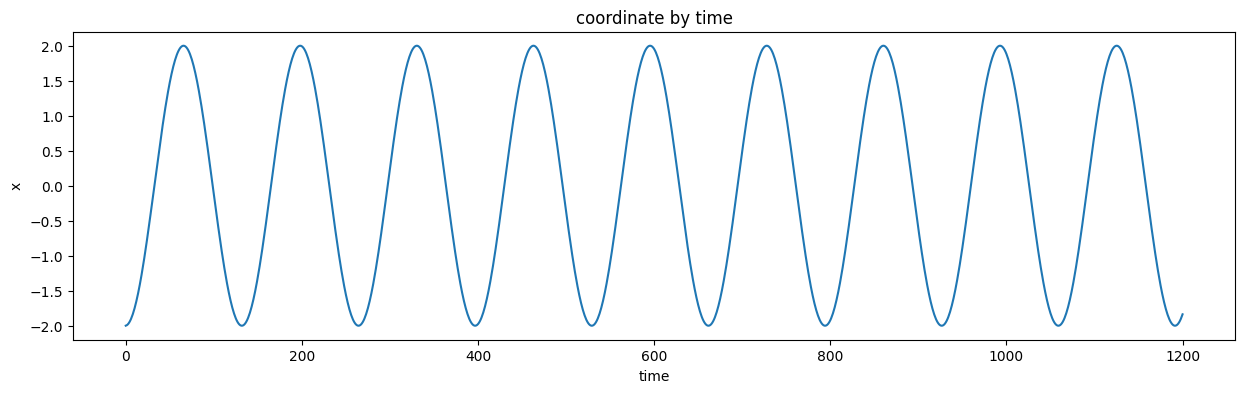

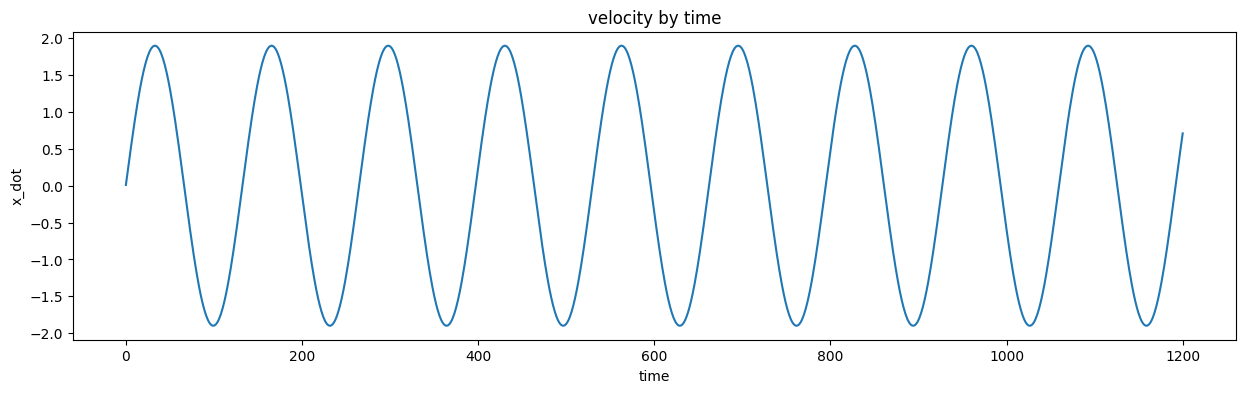

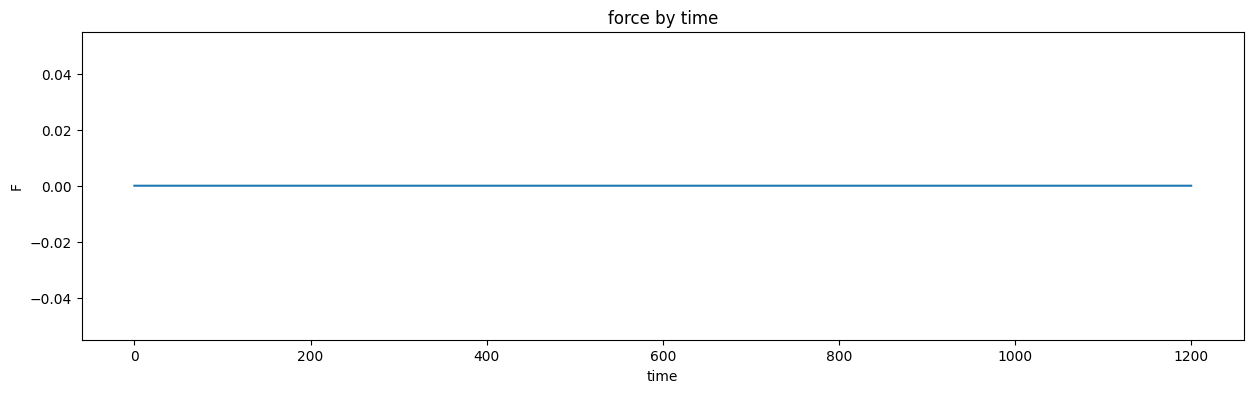

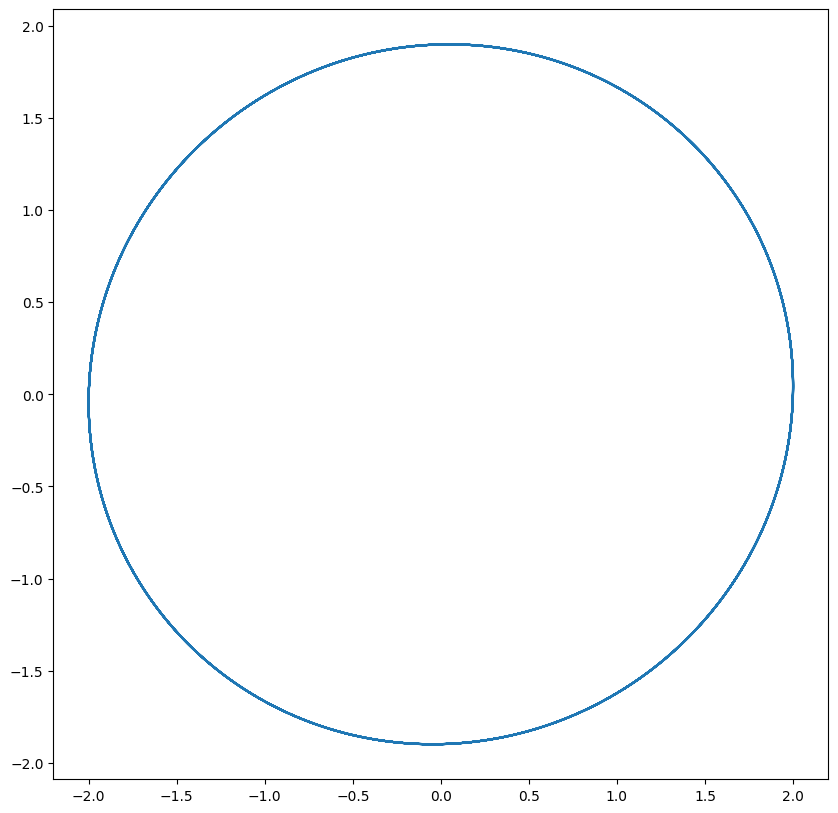

In [ ]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact
from IPython.display import display, clear_output
import copy

def plot_1d(data, xlabel, ylabel, title):
    plt.figure(figsize=(15, 4))
    
    for d in data:
        plt.plot(d)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

class Oscillator:
    def __init__(self, A, m = 1.0, x0 = 3, v0 = 0.01,
                 dt = 0.05, real_stiffness = 0.7,
                 stiffness_initial_guess = 0.37):
        self.m = m
        
        self.x = np.array([[x0], [v0]])
        self.dt = dt
        
        self.real_stiffness = real_stiffness
        self.stiffness_estimate = stiffness_initial_guess
        
        self.A = A
        
        self.B = np.array([[0],
                           [1 / self.m]])
        
    def get_state(self):
        return self.x
    
    def sys_dyn(self, u_scalar):
        x_dot = np.zeros_like(self.x)
        
        u = np.array([[u_scalar]])
        
        x_dot = self.A @ self.x + self.B @ u
        
        return x_dot
    
    def integrate_sys_dyn(self, sys_dyn):        
        self.x[1] += sys_dyn[1] * self.dt
        self.x[0] += self.x[1] * self.dt

    def draw(self, canvas, WIND_X, WIND_Y, scale, color = (123, 234, 234)):
        cv2.line(canvas, (0, WIND_Y // 2), (WIND_X, WIND_Y // 2), (123, 234, 234), 5)
        
        cv2.rectangle((WIND_X // 2 + self.x[0, 0] * scale - 25, WIND_Y // 2 - 20),
                      (WIND_X // 2 + self.x[0, 0] * scale + 25, WIND_Y // 2),
                      color, 7)

def run_oscillator(x0, iter_num, visualize, m, real_stiffness, dt, compensation = False,
                 update = False):
    if (visualize == True):
        WIND_X = 700
        WIND_Y = 700
        canvas = np.ones((700, 700, 3), np.uint8) * 70
    
    #real A matrix
    A = np.array([[0, 1],
                  [- real_stiffness / m, 0]])
    
    #initial estimate
    A_hat = np.array([[0.0, 0],
                      [0, 0]])

    i = 0

    x_traj = []
    v_traj = []
    u_traj = []
    
    oscillator = Oscillator(A, x0 = x0, dt = dt, real_stiffness = real_stiffness)
    
    desired_x = 0
            
    while(True):
        state = copy.deepcopy(oscillator.get_state())
        
        control = 0
        
        x_dot = oscillator.sys_dyn(control)
                
        oscillator.integrate_sys_dyn(x_dot)
        
        # YOUR CODE BELOW

        # YOUR CODE ABOVE
        
        x_traj.append(state[0, 0])
        v_traj.append(state[1, 0])
        u_traj.append(control)
        
        i += 1

        if (i > iter_num):
            break

        if (visualize == True):
            canvas = cv2.addWeighted(canvas, 0.93, canvas, 0, 0)

            oscillator.draw(canvas, WIND_X // 2, WIND_Y // 2, 100,
                          state[0, 0], (123, 234, 45), inverted = False)

            cv2.imshow("oscillator", canvas)

            key = cv2.waitKey(10) & 0xFF

            if (key == ord('q')):
                break
        
    if (visualize == True):
        cv2.destroyAllWindows()
        cv2.waitKey(10)
    
    plot_1d([x_traj], "time", "x", "coordinate by time")
    plot_1d([v_traj], "time", "x_dot", "velocity by time")
    plot_1d([u_traj], "time", "F", "force by time")
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_traj, v_traj)
    plt.show()
    clear_output(wait = True)
    
    return x_traj, v_traj, u_traj, A_hat, A

dt = 0.05

x_hist, v_hist, u_hist, A_hat, A = run_oscillator(x0 = -2, iter_num = 1200, visualize = False,
                        m = 1, real_stiffness = 0.9, dt = dt, compensation = True, update = True)

In [8]:
print(A_hat)

[[ 0.99775  0.05   ]
 [-0.045    1.     ]]


Похоже ли это на матрицу, которая используется при нахождении вектора x_dot в интегрировании системы?

Как будто бы это не она. Матрица $A$ сама по себе выглядит так:

In [9]:
print(A)

[[ 0.   1. ]
 [-0.9  0. ]]


Чем объясняется это различие?

Давайте вспомним, как связаны матрицы $A$ и $\mathbb{A}_{\Delta t}$. Именно ответ на этот вопрос позволит получить из A_hat в коде оценку на матрицу непрерывной системы. Сделайте это в следующей клетке.

In [ ]:
# YOUR CODE BELOW

# YOUR CODE ABOVE

print(A_estimate_continious)

[[-4.50000000e-02  1.00000000e+00]
 [-9.00000000e-01 -1.11022302e-14]]


In [11]:
print(np.allclose(A, A_estimate_continious, atol=0.1))

True


Если здесь True, то ура, задача решена корректно.

#### Задача 3

Давайте обобщим эту технику на системы с управлением. Вместо системы $\dot{x} = A x + B u$ рассмотрим систему $\dot{x} = C y$, где $y$ - дополненный вектор состояния, а $C$ - дополненная матрица системы:

$C = (A|B)$

$y = 
\begin{pmatrix}
x \\
u
\end{pmatrix}
$

Будем оценивать матрицу $C$ целиком. К счастью, нигде в матричном дифференцировании, которое мы использовали выше, не требуется квадратность матриц, ведь матрица $C$ имеет размерность $n \times (n+m)$.

Выведите градиентный шаг для обновления $C$ в следующей клетке.

YOUR MARKDOWN BELOW

e = ...

...

$\hat{C} -= ...$

YOUR MARKDOWN ABOVE

Реализуйте выведенный метод для осциллятора с управлением. На этот раз система будет колебаться не сама по себе, мы будем прикладывать к ней случайные воздействия, и так сможем оценить как матрицу самой системы $A$, так и матрицу управления $B$.

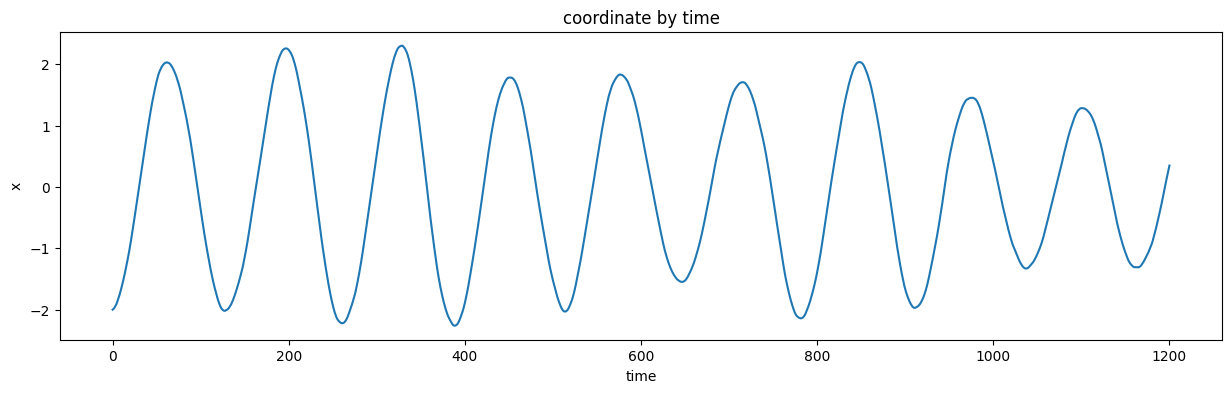

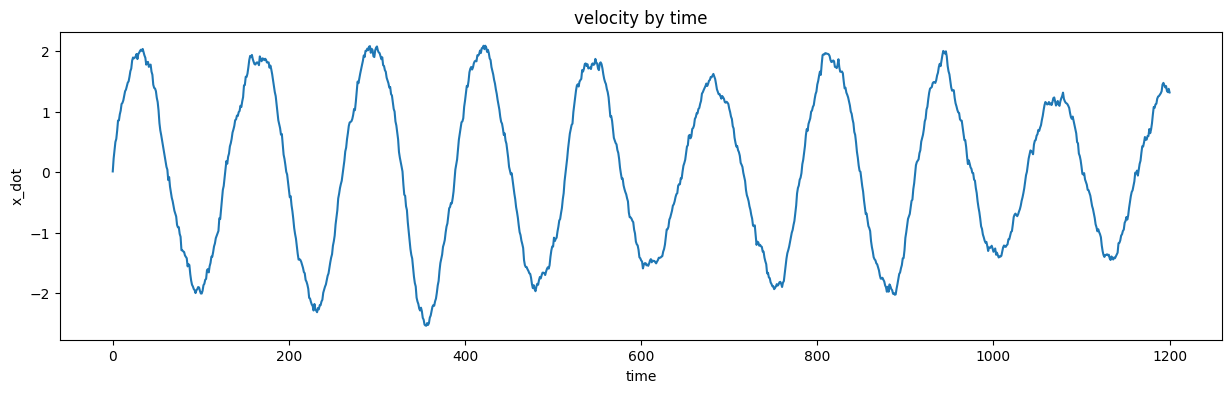

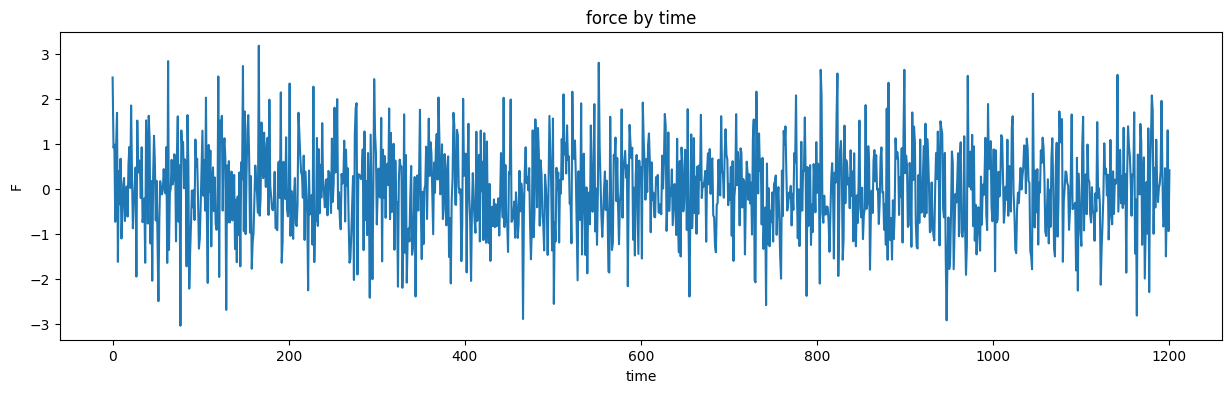

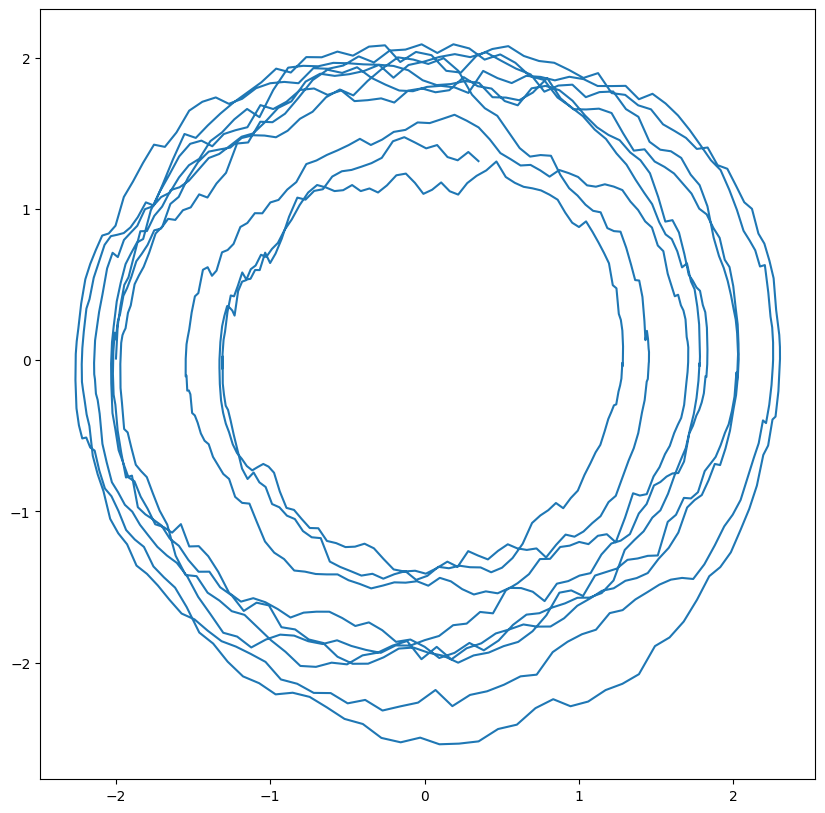

In [ ]:
def run_oscillator(x0, iter_num, visualize, m, real_stiffness, dt, compensation = False,
                 update = False):
    if (visualize == True):
        WIND_X = 700
        WIND_Y = 700
        canvas = np.ones((700, 700, 3), np.uint8) * 70
    
    #real A matrix
    A = np.array([[0, 1],
                  [- real_stiffness / m, -0.01]])
    
    #initial estimate
    C_hat = np.array([[0.0, 0, 0],
                      [0, 0, 0]])

    i = 0

    x_traj = []
    v_traj = []
    u_traj = []
    
    oscillator = Oscillator(A, x0 = x0, dt = dt, real_stiffness = real_stiffness)
    
    desired_x = 0
            
    while(True):
        state = copy.deepcopy(oscillator.get_state())
        
        control = np.random.randn(1)[0]
        
        x_dot = oscillator.sys_dyn(control)
                
        oscillator.integrate_sys_dyn(x_dot)
        
        # YOUR CODE BELOW
        
        # YOUR CODE ABOVE
        
        x_traj.append(state[0, 0])
        v_traj.append(state[1, 0])
        u_traj.append(control)
        
        i += 1

        if (i > iter_num):
            break

        if (visualize == True):
            canvas = cv2.addWeighted(canvas, 0.93, canvas, 0, 0)

            oscillator.draw(canvas, WIND_X // 2, WIND_Y // 2, 100,
                          state[0, 0], (123, 234, 45), inverted = False)

            cv2.imshow("oscillator", canvas)

            key = cv2.waitKey(10) & 0xFF

            if (key == ord('q')):
                break
        
    if (visualize == True):
        cv2.destroyAllWindows()
        cv2.waitKey(10)
    
    plot_1d([x_traj], "time", "x", "coordinate by time")
    plot_1d([v_traj], "time", "x_dot", "velocity by time")
    plot_1d([u_traj], "time", "F", "force by time")
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_traj, v_traj)
    plt.show()
    clear_output(wait = True)
    
    return x_traj, v_traj, u_traj, C_hat, A

dt = 0.05

x_hist, v_hist, u_hist, C_hat, A = run_oscillator(x0 = -2, iter_num = 1200, visualize = False,
                        m = 1, real_stiffness = 0.9, dt = dt, compensation = True, update = True)

Найдите матрицы $A$ и $B$ непрерывной системы.

In [ ]:
# YOUR CODE BELOW



print(C_ha)

# YOUR CODE ABOVE

[[-0.045   0.9995  0.05  ]
 [-0.9    -0.01    1.    ]]


Попробуйте усилить шум, умножив его на число. Обратите внимание, что хоть траектория и становится все более и более хаотичной, осцилляции все же сохраняются. Как влияет увеличение амплитуды шума на сходимость параметров к реальному значению?

Попробуйте добавить в систему вязкое трение. Как это влияет на траекторию системы?